# Bridge superstructure section

In [1]:
import opstool as opst
import matplotlib.pyplot as plt

We create a polygonal patch (a single I-beam) by incrementing the x,y coordinates:

In [2]:
incrs = [
    (0.72, 0.0),
    (0, 0.22),
    (-0.26, 0.23),
    (0, 0.84),
    (0.1, 0.1),
    (0.33, 0.07),
    (0, 0.13),
    (-1.06, 0.0),
    (0, -0.13),
    (0.33, -0.07),
    (0.1, -0.1),
    (0, -0.84),
    (-0.26, -0.23),
    (0, -0.22),
]

points = opst.pre.section.create_polygon_points(
    start=(0, 0),
    incrs=incrs,
)
patch = opst.pre.section.create_polygon_patch(outline=points)

Returns a [Geometry](https://sectionproperties.readthedocs.io/en/latest/gen/sectionproperties.pre.geometry.Geometry.html#sectionproperties.pre.geometry.Geometry) class object of ``sectionproperties``, we can call any of its attributes and methods, such as visualizing geometry:

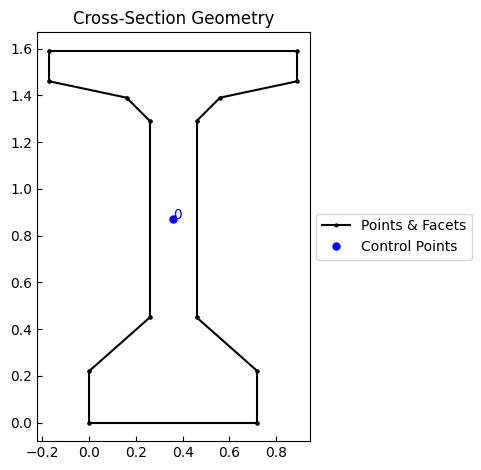

In [3]:
patch.plot_geometry()
plt.show()

We can offset this patch to get a new patch to get multiple I-beams:

In [4]:
patches = [patch]
for i in range(5):
    patches.append(patches[-1].shift_section(x_offset=2.21))

[Geometry](https://sectionproperties.readthedocs.io/en/latest/gen/sectionproperties.pre.geometry.Geometry.html#sectionproperties.pre.geometry.Geometry) class overloads the ``+`` operator for merging, so you can call the ``sum`` function to merge all patches into one:

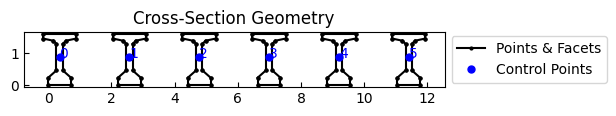

In [5]:
# you can try patches[0] + patches[1] + patches[2] + patches[3] + patches[4] + patches[5]

girder = sum(patches[1:], start=patches[0])
girder.plot_geometry()
plt.show()

We create the bridge deck:

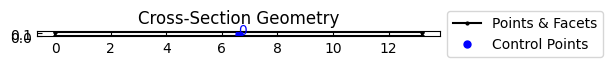

In [6]:
points = [(0, 0), (13.2, 0), (13.2, 0.165), (0, 0.165)]
deck = opst.pre.section.create_polygon_patch(outline=points)

deck.plot_geometry()
plt.show()

We can first align the centers of the two:

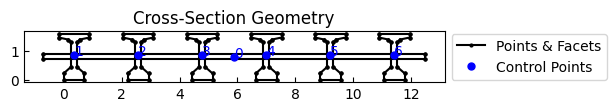

In [7]:
deck = deck.align_center(align_to=girder)
(deck + girder).plot_geometry()
plt.show()

Then align it to the top:

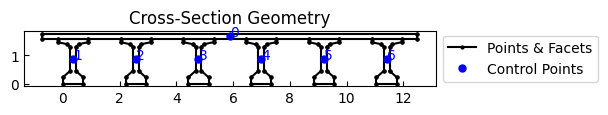

In [8]:
deck = deck.align_to(girder, on="top")
(deck + girder).plot_geometry()
plt.show()

Combination and fiber meshing:

In [9]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group(deck + girder)
SEC_MESH.set_mesh_size(0.15)
SEC_MESH.set_mesh_color("#87ae73")
SEC_MESH.mesh()

OPSTOOL :: The section My Section has been successfully meshed!

In [10]:
props = SEC_MESH.get_frame_props(display_results=True)

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 6.085E+00              │ Cross-sectional area                   │
│ centroid  │ (5.885E+00, 1.112E+00) │ Elastic centroid                       │
│ Iy        │ 2.356E+00              │ Moment of inertia y-axis               │
│ Iz        │ 8.743E+01              │ Moment of inertia z-axis               │
│ Iyz       │ 1.421E-14              │ Product of inertia                     │
│ Wyt       │ 3.663E+00              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 2.119E+00              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 1.325E+01              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 1.325E+01              │ Section moduli of bottom fibres z-axis │
│ J         │ 1.845E-01              │ Torsion constant                       │
│ phi       │ -9.000E+01             │ Principal axis angle                   │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

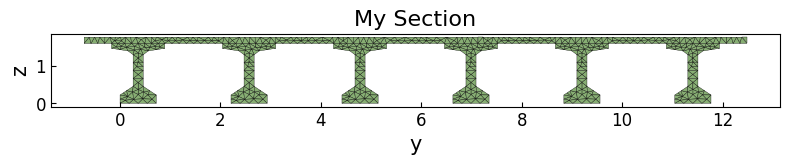

In [11]:
SEC_MESH.view(show_legend=False)
plt.gca().set_aspect(0.75)
plt.show()